# Objectives

1. What are Hyperparameters ? Why is Hyperparameter Tuning important ?
2. What is k-fold Cross-validation ? 
3. What is Grid Search Tuning ? What are its limitations ?
4. Making predictions with the best model

Run and example on a make moons dataset from sklearn for illustration

# Warm-up

**In groups of 2-3, run a quick research on Hyperparameters and try to answer the following:**

1. What is the importance of the Hyperparameter Tuning step in the ML workflow ?
2. Name 5 different hyperparameters for each of the ML algorithms you already know (Logistic Regression, Random Forest and Linear Regression)

## A

linear regression, parameters: intercept and the weights are model parameters.
model parameters are: the parameters that the model learns during training automatically. They are used for prediction.

what are the hyperparameters ? they are parameters that are NOT learned by the model during training, rather 
they are manually by the practitioner. They control an aspect of the training of the model. The model does not
use the values of hyperparameters in predicting.

## 1. What are Hyperparameters ?

**Hyperparameters are:**

1. A variable that controls some aspect of the training process of a ML algorithm
2. The value of a hyperparameter is **NOT** learned by the ML algorithm during training
3. The value of the hyperparameter is set by the ML parctitioner
4. All ML algorithms available have some hyperparameters, some more than others. They come with default values for their hyperparameters.
5. The best set of values for an ML algorithm is **problem/data-dependent** and is obtained using a hyperparameter tunung method.
6. Tuning hyperparameters will probably result in a better model that is not overfitted and generalizes well to unseen data.


### Let's build some dataset for illustration

In [31]:
from sklearn.datasets import make_moons
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
X, y = make_moons(n_samples=600, noise=0.3)

In [33]:
X.shape, y.shape

((600, 2), (600,))

In [34]:
X

array([[ 0.36799293,  0.97572194],
       [-0.04754785,  1.02039633],
       [ 0.7403458 ,  0.07522932],
       ...,
       [ 0.66484183,  0.18425959],
       [ 1.21211557,  0.29463191],
       [ 2.07059996,  0.15856731]])

In [35]:
y

array([0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1,

### Let's plot the data

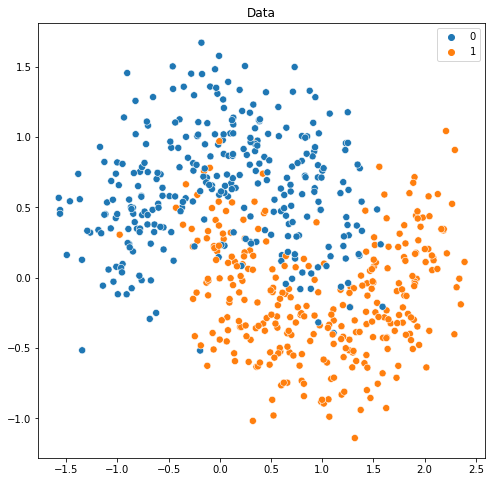

In [36]:
fig, ax = plt.subplots(figsize=(8,8))

sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, s=50, ax=ax).set_title("Data");

### Q: Which type of problem is this ? Which ML algorithms are viable options ?

### Let's try a Random Forest Classifier

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [38]:
# we must split the data!

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y)

In [39]:
Xtrain.shape, Xtest.shape

((450, 2), (150, 2))

In [40]:
rf = RandomForestClassifier()   # using default values

In [41]:
rf.fit(Xtrain, ytrain)

RandomForestClassifier()

In [42]:
rf.score(Xtrain, ytrain)

1.0

- overfitting, probably comes from not setting some hyperparameters
- I did not validate my model!

## 2. K-fold Cross-Validation

- It is a statistical resampling procedure used to evaluate machine learning models on a limited data sample

- It has a single parameter called k that refers to the number of groups that a given data sample is to be split into

- It is used to estimate the skill of a ML model on unseen data

With cross-validation, we don't need a separate validation dataset. We can use all our training data for model fitting and selection!

* With cross-validation, we can see if our model is overfitting, without touching the test data. 
* The training-data gets split again into k smaller sets and we get back k validation scores. 
* The mean of these scores can then be compared to our training score.

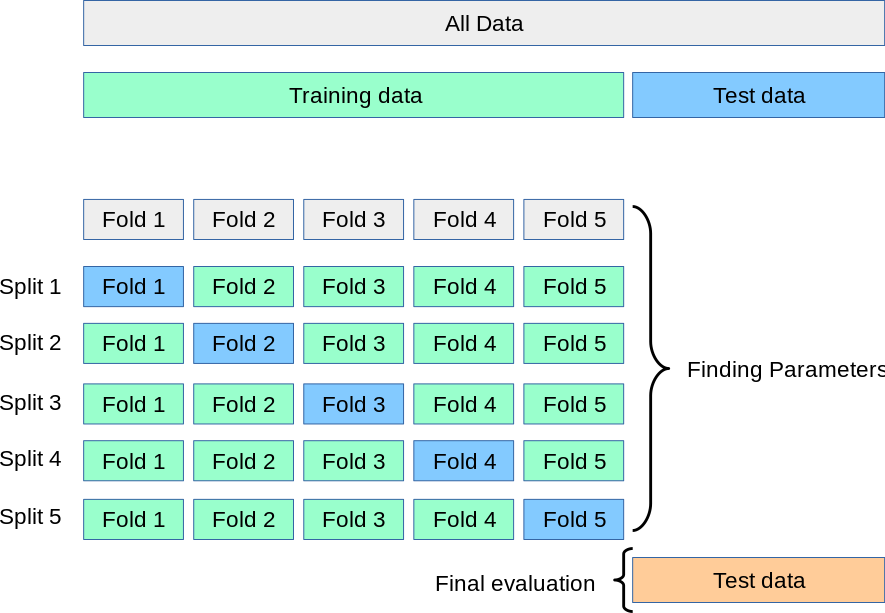

### Let's apply this to our data

In [43]:
from sklearn.model_selection import cross_val_score

In [47]:
rf = RandomForestClassifier()   # using default values

In [48]:
cross_acc = cross_val_score(estimator=rf,        # estimator: # the model you want to evaluate 
                            X=Xtrain,            # the training input data 
                            y=ytrain,            # the training output data  
                            cv=10,                # number of cross validation datasets, k   
                            scoring='accuracy'   # evaluation metric 
                            ) 

In [49]:
cross_acc

array([0.93333333, 0.88888889, 0.97777778, 0.93333333, 0.93333333,
       0.86666667, 0.95555556, 0.86666667, 0.82222222, 0.82222222])

In [50]:
# Comparing mean of the cv-scores with our training score
cross_acc.mean()   

0.9000000000000001

In [51]:
cross_acc.std()

0.05187830013301669

### Q: so what does this comparision tell us ?

* If training score >> mean(validation_scores), then you are overfitting!!
* If there is **high variation** in the validation scores, then you have high sampling bias! You probably need more data, pick a different model or change the hyperparameters

## Grid Search Tuning

* Instead of trying out different hyperparameters values manually, we can use a **Grid Search**
* **Input**: we provide a dictionary with hyperparameters and their possible values that will be "searched"
* For **each and every** possible combination of the values we input, a model is trained and validated using CV and the validation score is stored (cv_acc.mean())
* After **all** models are validated, the model of the best validation score wins!

In [52]:
from sklearn.model_selection import GridSearchCV

In [53]:
rf_opt = RandomForestClassifier()

In [54]:
# define our hyperparameters to combine

hyperparam_grid = {
    'max_depth': [2, 5, 10, 20, 30], 
    'n_estimators': [5, 10, 100, 200],
    'min_samples_leaf': [1,5,10]
}

In [55]:
grid_cv = GridSearchCV(estimator=rf_opt,            # estimator
                       param_grid=hyperparam_grid,  # hyperparameters dict
                       cv=5,                        # number of folds, k
                       scoring='accuracy')                # scoring metric

In [56]:
# fit all models with all the different hyperparamters
grid_cv.fit(Xtrain, ytrain)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 5, 10, 20, 30],
                         'min_samples_leaf': [1, 5, 10],
                         'n_estimators': [5, 10, 100, 200]},
             scoring='accuracy')

### How can we examine the results ??

## 4. Making predictions with the best model

### 1. Examining all results

In [57]:
pd.DataFrame(grid_cv.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.009214,0.003092,0.001133,2.308165e-04,2,1,5,"{'max_depth': 2, 'min_samples_leaf': 1, 'n_est...",0.922222,0.922222,0.844444,0.900000,0.811111,0.880000,0.044666,54
1,0.008577,0.001487,0.000800,1.051759e-04,2,1,10,"{'max_depth': 2, 'min_samples_leaf': 1, 'n_est...",0.911111,0.855556,0.888889,0.911111,0.833333,0.880000,0.030952,56
2,0.066039,0.000215,0.004446,7.079707e-06,2,1,100,"{'max_depth': 2, 'min_samples_leaf': 1, 'n_est...",0.933333,0.877778,0.900000,0.911111,0.822222,0.888889,0.037843,43
3,0.131664,0.000174,0.008569,2.922564e-05,2,1,200,"{'max_depth': 2, 'min_samples_leaf': 1, 'n_est...",0.933333,0.866667,0.900000,0.911111,0.822222,0.886667,0.038746,49
4,0.003654,0.000016,0.000477,2.319410e-06,2,5,5,"{'max_depth': 2, 'min_samples_leaf': 5, 'n_est...",0.866667,0.922222,0.888889,0.911111,0.822222,0.882222,0.035556,51
5,0.006928,0.000011,0.000691,4.290475e-06,2,5,10,"{'max_depth': 2, 'min_samples_leaf': 5, 'n_est...",0.911111,0.888889,0.888889,0.911111,0.844444,0.888889,0.024343,48
6,0.066253,0.000503,0.004460,4.140380e-05,2,5,100,"{'max_depth': 2, 'min_samples_leaf': 5, 'n_est...",0.933333,0.877778,0.900000,0.911111,0.833333,0.891111,0.033993,36
7,0.132369,0.000571,0.008700,1.660403e-04,2,5,200,"{'max_depth': 2, 'min_samples_leaf': 5, 'n_est...",0.933333,0.900000,0.900000,0.911111,0.833333,0.895556,0.033407,22
8,0.003668,0.000037,0.000478,4.567194e-06,2,10,5,"{'max_depth': 2, 'min_samples_leaf': 10, 'n_es...",0.922222,0.911111,0.866667,0.900000,0.844444,0.888889,0.028974,43
9,0.006954,0.000012,0.000697,3.656443e-06,2,10,10,"{'max_depth': 2, 'min_samples_leaf': 10, 'n_es...",0.922222,0.866667,0.877778,0.922222,0.811111,0.880000,0.041216,54


### 2. Examining the best set of values for the hyperparameters

In [58]:
grid_cv.best_params_  

{'max_depth': 10, 'min_samples_leaf': 5, 'n_estimators': 5}

### 3. Estimating the test performance after tuning

In [25]:
rf_best = grid_cv.best_estimator_

cross_acc = cross_val_score(estimator=rf_best,   # estimator: # the model you want to evaluate 
                            X=Xtrain,         # the training input data 
                            y=ytrain,         # the training output data  
                            cv=5,          # number of cross validation datasets, k   
                            scoring='accuracy') # evaluation metric 

In [26]:
cross_acc

array([0.86666667, 0.83333333, 0.96666667, 0.83333333, 0.93333333])

In [27]:
cross_acc.mean()

0.8866666666666667

### 4. Calculating the test score with the best model

In [28]:
rf_best = grid_cv.best_estimator_

In [29]:
rf_best

RandomForestClassifier(max_depth=30, min_samples_leaf=5, n_estimators=5)

In [30]:
rf_best.score(Xtest, ytest)

0.86